## Assignment 

A Quick Service Restaurant has 4 walk-in refrigeration units. There is an energy meter installed at power supply of each of the 4 refrigeration units. There is also 1 temperature sensor installed inside each of these. Attached is data for power (kW) and temperature (degrees Celsius) for 4 energy meters and 4 temperature sensors for 10 days.

Do a comparative analysis of following parameters and prepare a presentation. You are allowed to use any tool for the analysis.

1. Duty cycle
2. Set temperature range (lower threshold and upper threshold)
3. Average daily energy consumption
4. Percentage of temperature compliance


Submitted by - Vaibhav Bichave

In [1]:
#Loading Required libraries 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [1]:
pip install flask

  Using cached Flask-2.0.2-py3-none-any.whl (95 kB)
Note: you may need to restart the kernel to use updated packages.


In [3]:
df = pd.read_excel("Assignment (1) (2).xlsx")

In [4]:
df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,NaN,Datetime,Refrigeration Unit - 1,NaN,Refrigeration Unit - 2,NaN,Refrigeration Unit - 3,NaN,Refrigeration Unit - 4,NaN
1,NaN,NaN,Power,Temperature,Power,Temperature,Power,Temperature,Power,Temperature
2,NaN,2017-08-01 00:00:00,2.2585,4.81,3.231,0.495,0,8.93,0.308,3.34
3,NaN,2017-08-01 00:01:00,2.2035,3.9,3.188,0.245,0,8.9,1.338,3.435
4,NaN,2017-08-01 00:02:00,2.13,3.155,3.1845,0,0,8.87,2.3695,2.715


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14402 entries, 0 to 14401
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  0 non-null      float64
 1   Unnamed: 1  14401 non-null  object 
 2   Unnamed: 2  14325 non-null  object 
 3   Unnamed: 3  14401 non-null  object 
 4   Unnamed: 4  13908 non-null  object 
 5   Unnamed: 5  14014 non-null  object 
 6   Unnamed: 6  14169 non-null  object 
 7   Unnamed: 7  14401 non-null  object 
 8   Unnamed: 8  13160 non-null  object 
 9   Unnamed: 9  14331 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.1+ MB


From info() we can come to know that every feature is in string format so, we required data preprocessing and data cleaning.

In [6]:
data = df.iloc[2:,1:]

data.columns = ["Date","power_1","temperature_1","power_2","temperature_2",
                "power_3","temperature_3","power_4","temperature_4"]
data

,Date,power_1,temperature_1,power_2,temperature_2,power_3,temperature_3,power_4,temperature_4
2,2017-08-01 00:00:00,2.2585,4.81,3.231,0.495,0,8.93,0.308,3.34
3,2017-08-01 00:01:00,2.2035,3.9,3.188,0.245,0,8.9,1.338,3.435
4,2017-08-01 00:02:00,2.13,3.155,3.1845,0,0,8.87,2.3695,2.715
5,2017-08-01 00:03:00,2.1425,2.715,3.1695,-0.215,0,8.81,2.2265,2.125
6,2017-08-01 00:04:00,1.225,2.31,3.1735,-0.495,0,8.81,2.231,1.745
...,...,...,...,...,...,...,...,...,...
14397,2017-08-10 23:55:00,1.2655,4.84,0,16.465,2.27,3.68,0.3095,1.435
14398,2017-08-10 23:56:00,2.2785,4.685,0,16.5,2.4695,3.465,0.309,1.93
14399,2017-08-10 23:57:00,2.149,3.9,0,16.5,2.4275,2.935,0.309,2.62
14400,2017-08-10 23:58:00,2.147,3.275,0,16.53,2.413,2.375,0.309,3.155


Here, we rename each feature so for all 4 walk-in refrigeration units.

In [7]:
data['Year'] = pd.DatetimeIndex(data['Date']).year
data['Month'] = pd.DatetimeIndex(data['Date']).month
data['Day'] = pd.DatetimeIndex(data['Date']).day
data

,Date,power_1,temperature_1,power_2,temperature_2,power_3,temperature_3,power_4,temperature_4,Year,Month,Day
2,2017-08-01 00:00:00,2.2585,4.81,3.231,0.495,0,8.93,0.308,3.34,2017,8,1
3,2017-08-01 00:01:00,2.2035,3.9,3.188,0.245,0,8.9,1.338,3.435,2017,8,1
4,2017-08-01 00:02:00,2.13,3.155,3.1845,0,0,8.87,2.3695,2.715,2017,8,1
5,2017-08-01 00:03:00,2.1425,2.715,3.1695,-0.215,0,8.81,2.2265,2.125,2017,8,1
6,2017-08-01 00:04:00,1.225,2.31,3.1735,-0.495,0,8.81,2.231,1.745,2017,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...
14397,2017-08-10 23:55:00,1.2655,4.84,0,16.465,2.27,3.68,0.3095,1.435,2017,8,10
14398,2017-08-10 23:56:00,2.2785,4.685,0,16.5,2.4695,3.465,0.309,1.93,2017,8,10
14399,2017-08-10 23:57:00,2.149,3.9,0,16.5,2.4275,2.935,0.309,2.62,2017,8,10
14400,2017-08-10 23:58:00,2.147,3.275,0,16.53,2.413,2.375,0.309,3.155,2017,8,10


Here, I have broken day, month, year in various column so that we can perform operation on each feature. 

In [8]:
for col in data.iloc[:,1:].columns:
    data[col]=data[col].astype(float, errors = 'raise')

I have convert all columns in float , to perform operation on it.

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14400 entries, 2 to 14401
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           14400 non-null  object 
 1   power_1        14323 non-null  float64
 2   temperature_1  14400 non-null  float64
 3   power_2        13906 non-null  float64
 4   temperature_2  14013 non-null  float64
 5   power_3        14167 non-null  float64
 6   temperature_3  14400 non-null  float64
 7   power_4        13158 non-null  float64
 8   temperature_4  14330 non-null  float64
 9   Year           14400 non-null  float64
 10  Month          14400 non-null  float64
 11  Day            14400 non-null  float64
dtypes: float64(11), object(1)
memory usage: 1.3+ MB


In [10]:
data.isna().sum()

Date                0
power_1            77
temperature_1       0
power_2           494
temperature_2     387
power_3           233
temperature_3       0
power_4          1242
temperature_4      70
Year                0
Month               0
Day                 0
dtype: int64

From above table, we can see that, there are missing or null value present in our data.

In [11]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
power_1,14323.0,1.123395,0.919815,0.000,0.2935,0.3210,2.166500,3.055500
temperature_1,14400.0,3.815729,2.035919,1.650,2.8400,3.8050,4.530000,102.375000
power_2,13906.0,1.708434,1.502829,0.000,0.3900,0.3950,3.332875,4.036500
temperature_2,14013.0,2.088892,3.372782,-4.090,-0.3400,2.0550,4.310000,102.625000
power_3,14167.0,1.603641,0.905182,0.000,0.2800,2.0855,2.152000,6.038333
temperature_3,14400.0,4.118913,3.401599,1.090,2.1800,2.8400,4.215000,101.905000
power_4,13158.0,1.372093,0.992891,0.000,0.3095,1.3550,2.363000,6.060000
temperature_4,14330.0,2.944373,2.576478,0.185,1.6200,2.4350,3.340000,101.655000
Year,14400.0,2017.000000,0.000000,2017.000,2017.0000,2017.0000,2017.000000,2017.000000
Month,14400.0,8.000000,0.000000,8.000,8.0000,8.0000,8.000000,8.000000


## 1. Refrigeration Unit - 1

In [12]:
df = data[["power_1","temperature_1","Day","Date"]]
df.columns= ["power","temperature","Day","Date"]
df.head()

,power,temperature,Day,Date
2,2.2585,4.810,1.0,2017-08-01 00:00:00
3,2.2035,3.900,1.0,2017-08-01 00:01:00
4,2.1300,3.155,1.0,2017-08-01 00:02:00
5,2.1425,2.715,1.0,2017-08-01 00:03:00
6,1.2250,2.310,1.0,2017-08-01 00:04:00


In [13]:
df.describe()

,power,temperature,Day
count,14323.000000,14400.000000,14400.000000
mean,1.123395,3.815729,5.500000
std,0.919815,2.035919,2.872381
min,0.000000,1.650000,1.000000
25%,0.293500,2.840000,3.000000
50%,0.321000,3.805000,5.500000
75%,2.166500,4.530000,8.000000
max,3.055500,102.375000,10.000000


In [14]:
df.isna().sum()

power          77
temperature     0
Day             0
Date            0
dtype: int64

In Refrigeration unit, there are missing value in power feature provided to us.

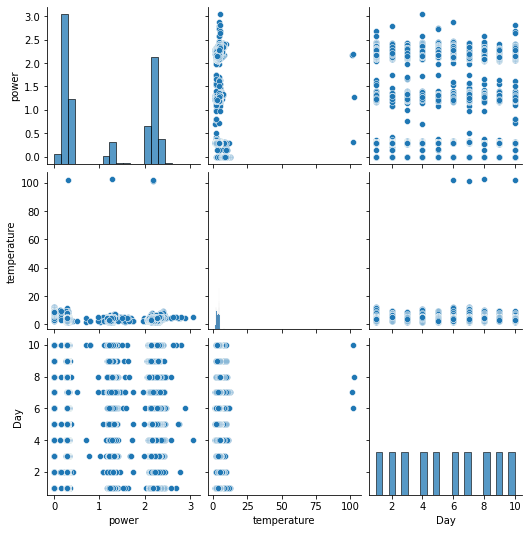

In [15]:
sns.pairplot(df);

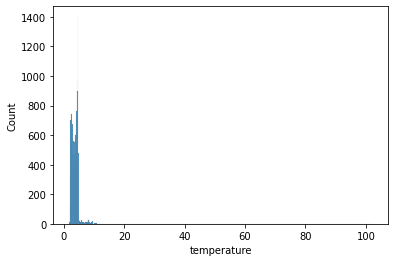

In [16]:
sns.histplot(df["temperature"]);

<AxesSubplot:xlabel='power'>

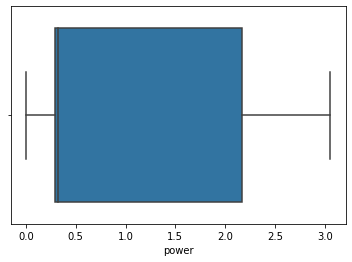

In [17]:
sns.boxplot(df["power"])

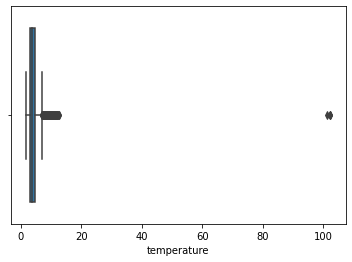

In [18]:
sns.boxplot(df["temperature"]);

### 1.1.  Duty cycle

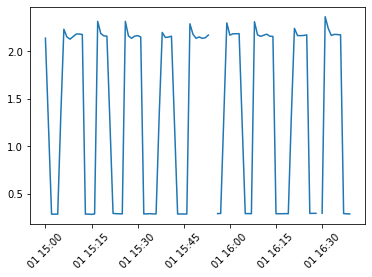

In [19]:
n,m = 900 , 1000
plt.plot(df["Date"][n:m],df["power"][n:m])
plt.xticks(rotation=45);

In Refrigeration Unit 1, Duty cucle is approximately 50%

## 1.2. Set temperature range (lower threshold and upper threshold)

In [20]:
l = df["temperature"]
mean = np.mean(l)
std = np.std(l)
print('mean of the dataset is', mean)
print('std. deviation is', std)


low = -3*std+mean
high = 3*std+mean
print("lower threshold for Temperature of Refrigeration unit is {:.3f}".format(low))
print("higher threshold for Temperature of Refrigeration unit is {:.3f}".format(high))

mean of the dataset is 3.8157290509259214
std. deviation is 2.035848185124619
lower threshold for Temperature of Refrigeration unit is -2.292
higher threshold for Temperature of Refrigeration unit is 9.923


## 1.3. Average daily energy consumption

Total avg daily energy of Refrigeration unit 3 is 1609.039


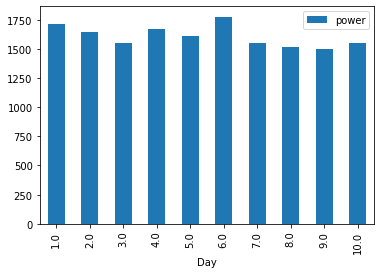

In [21]:
df.power.sum()
dff =(df.groupby("Day").sum()[["power"]])
dff.plot(kind = "bar");
print("Total avg daily energy of Refrigeration unit 3 is {:.3f}".format(dff.power.mean()))

## 1.4. Percentage of temperature compliance

In [22]:
outlier = []
for i in df.temperature:
    if (0<=i and i<=4):
        outlier.append(i)
print("Percentage of temperature compliance : {:.3f} %".format(len(outlier)/len(df.temperature)*100))


Percentage of temperature compliance : 55.792 %


-----------------------------------------------------------------------------------------

## 2. Refrigeration Unit - 2

In [23]:
df = data[["power_2","temperature_2","Day","Date"]]
df.columns= ["power","temperature","Day","Date"]
df.head()

,power,temperature,Day,Date
2,3.2310,0.495,1.0,2017-08-01 00:00:00
3,3.1880,0.245,1.0,2017-08-01 00:01:00
4,3.1845,0.000,1.0,2017-08-01 00:02:00
5,3.1695,-0.215,1.0,2017-08-01 00:03:00
6,3.1735,-0.495,1.0,2017-08-01 00:04:00


In [24]:
df.describe()

,power,temperature,Day
count,13906.000000,14013.000000,14400.000000
mean,1.708434,2.088892,5.500000
std,1.502829,3.372782,2.872381
min,0.000000,-4.090000,1.000000
25%,0.390000,-0.340000,3.000000
50%,0.395000,2.055000,5.500000
75%,3.332875,4.310000,8.000000
max,4.036500,102.625000,10.000000


In [25]:
df.isna().sum()

power          494
temperature    387
Day              0
Date             0
dtype: int64

In Refrigeration unit 2, there are missing value in power as well as temperature feature provided to us.

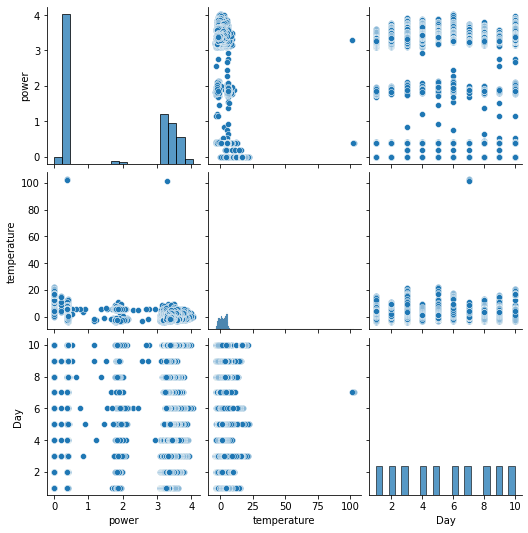

In [26]:
sns.pairplot(df);

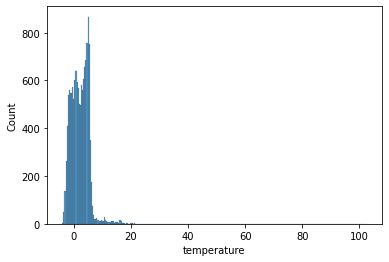

In [27]:
sns.histplot(df["temperature"]);

<AxesSubplot:xlabel='power'>

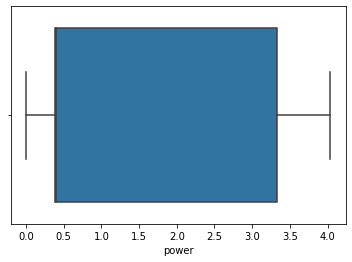

In [28]:
sns.boxplot(df["power"])

<AxesSubplot:xlabel='temperature'>

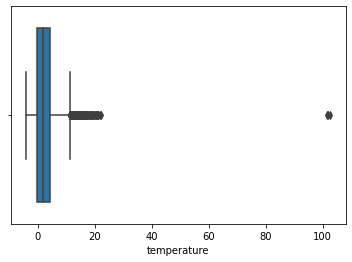

In [29]:
sns.boxplot(df["temperature"])

## 2.1. Duty cycle

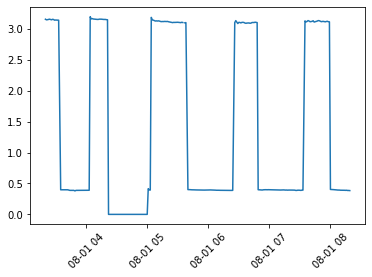

In [30]:
n,m=200,500
plt.plot(df["Date"][n:m],df["power"][n:m])
plt.xticks(rotation=45);

In Refrigeration Unit 2, Duty cucle is approximately 33.33-40%

## 2.2. Set temperature range (lower threshold and upper threshold)

In [31]:
l = df["temperature"]
mean = np.mean(l)
std = np.std(l)
print('mean of the dataset is', mean)
print('std. deviation is', std)


low = -3*std+mean
high = 3*std+mean
print("lower threshold for Temperature of Refrigeration unit is {:.3f}".format(low))
print("higher threshold for Temperature of Refrigeration unit is {:.3f}".format(high))

mean of the dataset is 2.0888921001926763
std. deviation is 3.372661540434807
lower threshold for Temperature of Refrigeration unit is -8.029
higher threshold for Temperature of Refrigeration unit is 12.207


## 2.3. Average daily energy consumption

Total avg daily energy of Refrigeration unit 2 is 2375.748


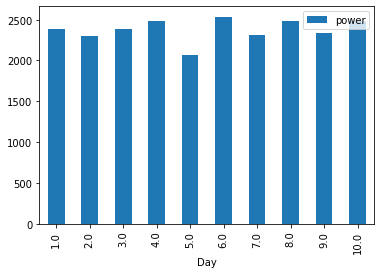

In [32]:
df.power.sum()
dff =(df.groupby("Day").sum()[["power"]])
dff.plot(kind = "bar");
print("Total avg daily energy of Refrigeration unit 2 is {:.3f}".format(dff.power.mean()))

## 2.4. Percentage of temperature compliance

In [33]:
outlier = []
for i in df.temperature:
    if (0<=i and i<=4):
        outlier.append(i)
print("Percentage of temperature compliance : {:.3f} %".format(len(outlier)/len(df.temperature)*100))

Percentage of temperature compliance : 41.896 %


------------------------------------------------------------------------------------------------

## 3. Refrigeration Unit - 3	

In [34]:
df = data[["power_3","temperature_3","Day","Date"]]
df.columns= ["power","temperature","Day","Date"]
df.head()

,power,temperature,Day,Date
2,0.0,8.93,1.0,2017-08-01 00:00:00
3,0.0,8.90,1.0,2017-08-01 00:01:00
4,0.0,8.87,1.0,2017-08-01 00:02:00
5,0.0,8.81,1.0,2017-08-01 00:03:00
6,0.0,8.81,1.0,2017-08-01 00:04:00


In [35]:
df.describe()

,power,temperature,Day
count,14167.000000,14400.000000,14400.000000
mean,1.603641,4.118913,5.500000
std,0.905182,3.401599,2.872381
min,0.000000,1.090000,1.000000
25%,0.280000,2.180000,3.000000
50%,2.085500,2.840000,5.500000
75%,2.152000,4.215000,8.000000
max,6.038333,101.905000,10.000000


In [36]:
df.isna().sum()

power          233
temperature      0
Day              0
Date             0
dtype: int64

In Refrigeration unit, there are missing value in power feature provided to us.

In [37]:
sns.pairplot(df);

Error in callback <function flush_figures at 0x00000000108E5430> (for post_execute):


KeyboardInterrupt: 

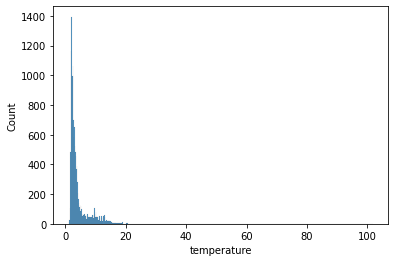

In [38]:
sns.histplot(df["temperature"]);

<AxesSubplot:xlabel='power'>

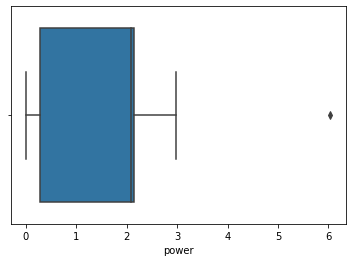

In [39]:
sns.boxplot(df["power"])

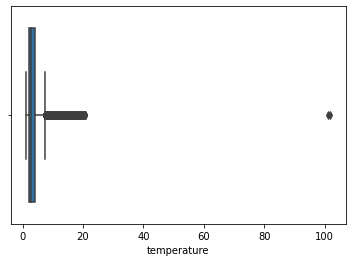

In [40]:
sns.boxplot(df["temperature"]);

## 3.1. Duty cycle

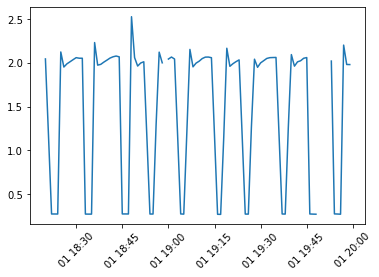

In [41]:
n,m = 1100, 1200
plt.plot(df["Date"][n:m],df["power"][n:m])
plt.xticks(rotation=45);

In Refrigeration Unit 3, Duty cucle is approximately 66-70%

## 3.2. Set temperature range (lower threshold and upper threshold)

In [42]:
l = df["temperature"]
mean = np.mean(l)
std = np.std(l)
print('mean of the dataset is', mean)
print('std. deviation is', std)


low = -3*std+mean
high = 3*std+mean
print("lower threshold for Temperature of Refrigeration unit is {:.3f}".format(low))
print("higher threshold for Temperature of Refrigeration unit is {:.3f}".format(high))

mean of the dataset is 4.118912847222223
std. deviation is 3.4014810714683055
lower threshold for Temperature of Refrigeration unit is -6.086
higher threshold for Temperature of Refrigeration unit is 14.323


## 3.3. Average daily energy consumption

Total avg daily energy of Refrigeration unit 3 is 2271.878


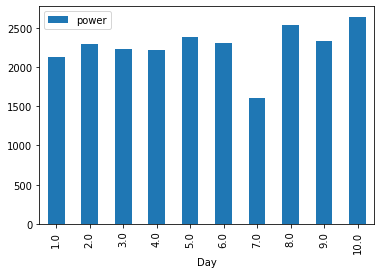

In [43]:
df.power.sum()
dff =(df.groupby("Day").sum()[["power"]])
dff.plot(kind = "bar");
print("Total avg daily energy of Refrigeration unit 3 is {:.3f}".format(dff.power.mean()))

## 3.4. Percentage of temperature compliance

In [44]:
outlier = []
for i in df.temperature:
    if (0<=i and i<=4):
        outlier.append(i)
print("Percentage of temperature compliance : {:.3f} %".format(len(outlier)/len(df.temperature)*100))


Percentage of temperature compliance : 73.125 %


------------------------------------------------------------------------------------------------

## 4. Refrigeration Unit - 4

In [45]:
df = data[["power_4","temperature_4","Day","Date"]]
df.columns= ["power","temperature","Day","Date"]
df.head()

,power,temperature,Day,Date
2,0.3080,3.340,1.0,2017-08-01 00:00:00
3,1.3380,3.435,1.0,2017-08-01 00:01:00
4,2.3695,2.715,1.0,2017-08-01 00:02:00
5,2.2265,2.125,1.0,2017-08-01 00:03:00
6,2.2310,1.745,1.0,2017-08-01 00:04:00


In [46]:
df.describe()

,power,temperature,Day
count,13158.000000,14330.000000,14400.000000
mean,1.372093,2.944373,5.500000
std,0.992891,2.576478,2.872381
min,0.000000,0.185000,1.000000
25%,0.309500,1.620000,3.000000
50%,1.355000,2.435000,5.500000
75%,2.363000,3.340000,8.000000
max,6.060000,101.655000,10.000000


In [47]:
df.isna().sum()

power          1242
temperature      70
Day               0
Date              0
dtype: int64

In Refrigeration unit, there are missing value in power feature provided to us.

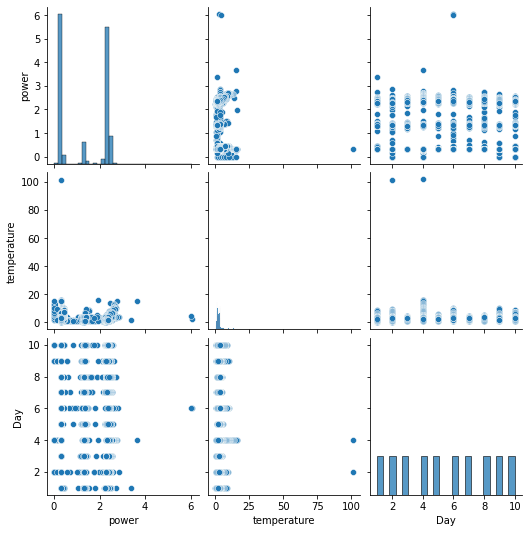

In [48]:
sns.pairplot(df);

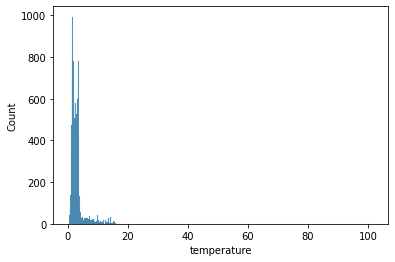

In [49]:
sns.histplot(df["temperature"]);

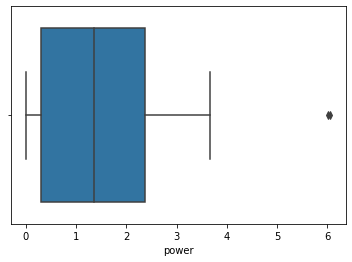

In [50]:
sns.boxplot(df["power"]);

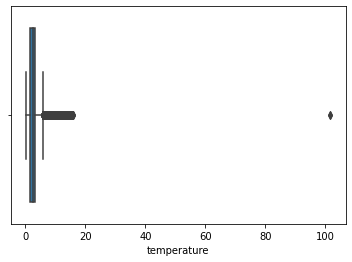

In [51]:
sns.boxplot(df["temperature"]);

## 4.1. Duty cycle

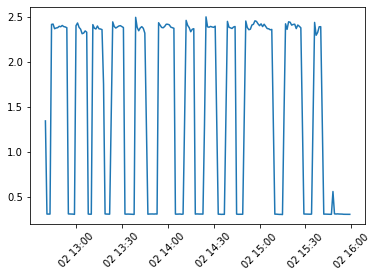

In [52]:
m,n =2200,2400
plt.plot(df["Date"][m:n],df["power"][m:n])
plt.xticks(rotation=45);

In Refrigeration Unit 4, Duty cucle is approximately 50-60%

## 4.2. Set temperature range (lower threshold and upper threshold)

In [53]:
l = df["temperature"]
mean = np.mean(l)
std = np.std(l)
print('mean of the dataset is', mean)
print('std. deviation is', std)


low = -3*std+mean
high = 3*std+mean
print("lower threshold for Temperature of Refrigeration unit is {:.3f}".format(low))
print("higher threshold for Temperature of Refrigeration unit is {:.3f}".format(high))

mean of the dataset is 2.9443734589439403
std. deviation is 2.576388321308895
lower threshold for Temperature of Refrigeration unit is -4.785
higher threshold for Temperature of Refrigeration unit is 10.674


## 4.3. Average daily energy consumption

Total avg daily energy of Refrigeration unit is 1805.400


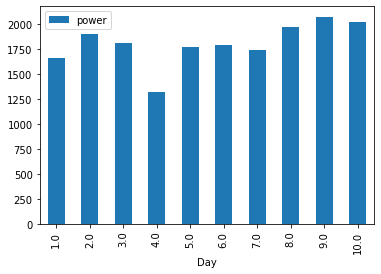

In [54]:
df.power.sum()
dff =(df.groupby("Day").sum()[["power"]])
dff.plot(kind = "bar");
print("Total avg daily energy of Refrigeration unit is {:.3f}".format(dff.power.mean()))

## 4.4. Percentage of temperature compliance

In [55]:
outlier = []
for i in df.temperature:
    if (0<=i and i<=4):
        outlier.append(i)
print("Percentage of temperature compliance : {:.3f} %".format(len(outlier)/len(df.temperature)*100))


Percentage of temperature compliance : 89.201 %


## Conclusion:
I have successfully calculated all the parameter listed in assignment.